In [1]:
import pandas as pd
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kneroma/tacotrashdataset

100% 2.79G/2.79G [01:47<00:00, 27.0MB/s]
100% 2.79G/2.79G [01:47<00:00, 27.8MB/s]


In [4]:
dataset = '/content/tacotrashdataset.zip'

In [5]:
from zipfile import ZipFile

In [6]:
with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [7]:
df = pd.read_csv('/content/meta_df.csv')

In [ ]:
df.head()

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0,127.0,447.0,1322.0,403954.0
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0,457.0,1429.0,1519.0,1071259.5
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0,292.0,1006.0,672.0,99583.5
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0,987.0,500.0,374.0,73832.5
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0,989.0,44.0,51.0,915.0


In [8]:
df.drop(columns=['img_width', 'img_height', 'cat_id', 'cat_name', 'ann_id', 'x', 'y', 'width', 'height', 'area'], axis=1, inplace=True)

In [ ]:
df['img_id'].nunique()

1500

In [ ]:
df.shape

(4784, 3)

In [ ]:
df.isnull().sum()

img_id           0
img_file         0
supercategory    0
dtype: int64

In [ ]:
df['supercategory'].unique()

array(['Bottle', 'Carton', 'Bottle cap', 'Can', 'Pop tab', 'Cup',
       'Plastic bag & wrapper', 'Styrofoam piece', 'Other plastic',
       'Plastic container', 'Paper', 'Cigarette', 'Lid', 'Straw',
       'Paper bag', 'Broken glass', 'Plastic utensils', 'Glass jar',
       'Food waste', 'Squeezable tube', 'Shoe', 'Aluminium foil',
       'Unlabeled litter', 'Blister pack', 'Battery', 'Rope & strings',
       'Scrap metal', 'Plastic glooves'], dtype=object)

In [9]:
# create a list of values to filter
#filter_list = ['Battery', 'Plastic glooves', 'Blister pack', 'Squeezable tube', 'Shoe', 'Rope & strings', 'Glass jar', 'Plastic utensils', 'Broken glass', 'Scrap metal', 'Styrofoam piece', 'Paper bag', 'Food waste', 'Other plastic', 'Unlabeled litter', '']
filter_list = ['Bottle', 'Plastic bag & wrapper']

# filter the dataframe based on the condition
df = df[df['supercategory'].isin(filter_list)]

In [10]:
df = df.iloc[:500]

In [11]:
path_list = []
for path in df['img_file']:
  path_list.append('/content/data/' + path)

In [12]:
print(path_list)

['/content/data/batch_1/000006.jpg', '/content/data/batch_1/000010.jpg', '/content/data/batch_1/000019.jpg', '/content/data/batch_1/000019.jpg', '/content/data/batch_1/000047.jpg', '/content/data/batch_1/000001.jpg', '/content/data/batch_1/000005.jpg', '/content/data/batch_1/000012.jpg', '/content/data/batch_1/000012.jpg', '/content/data/batch_1/000014.jpg', '/content/data/batch_1/000048.jpg', '/content/data/batch_1/000048.jpg', '/content/data/batch_1/000048.jpg', '/content/data/batch_1/000053.jpg', '/content/data/batch_1/000053.jpg', '/content/data/batch_1/000056.jpg', '/content/data/batch_1/000058.jpg', '/content/data/batch_1/000058.jpg', '/content/data/batch_1/000054.jpg', '/content/data/batch_1/000054.jpg', '/content/data/batch_1/000021.jpg', '/content/data/batch_1/000021.jpg', '/content/data/batch_1/000022.jpg', '/content/data/batch_1/000022.jpg', '/content/data/batch_1/000023.jpg', '/content/data/batch_1/000024.jpg', '/content/data/batch_1/000050.jpg', '/content/data/batch_1/0000

In [13]:
len(path_list)

500

In [14]:
df['supercategory'].value_counts()

Plastic bag & wrapper    388
Bottle                   112
Name: supercategory, dtype: int64

In [15]:
labels_dictionary = {'Plastic bag & wrapper':0,'Bottle':1}

In [16]:
labels = [labels_dictionary[i] for i in df['supercategory']]

In [17]:
print(labels[:5], labels[-5:])

[1, 1, 1, 1, 1] [1, 1, 0, 0, 0]


In [18]:
picture_names = path_list

In [ ]:
print(picture_names[:5], picture_names[-5:])

['/content/data/batch_1/000006.jpg', '/content/data/batch_1/000010.jpg', '/content/data/batch_1/000019.jpg', '/content/data/batch_1/000019.jpg', '/content/data/batch_1/000047.jpg'] ['/content/data/batch_13/000042.jpg', '/content/data/batch_13/000043.jpg', '/content/data/batch_13/000044.jpg', '/content/data/batch_13/000046.jpg', '/content/data/batch_13/000051.jpg']


In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

In [20]:
data = []

for path in picture_names:
  image = Image.open(path)
  image = image.resize((32, 32))
  image = np.array(image)
  data.append(image)

In [ ]:
print(len(data))

500


In [ ]:
type(data[1])

numpy.ndarray

In [ ]:
data[1].shape

(32, 32, 3)

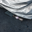

In [ ]:
cv2_imshow(data[1])

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

In [24]:
X = np.array(data)

In [25]:
Y = np.array(labels)

In [26]:
X = X/255

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(X, Y, validation_split=0.1, epochs=20)

Epoch 1/20
15/15 [==============================] - 0s 16ms/step - loss: 0.4233 - accuracy: 0.8133 - val_loss: 0.5532 - val_accuracy: 0.7000
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 0.4133 - accuracy: 0.8111 - val_loss: 0.5337 - val_accuracy: 0.7800
Epoch 3/20
15/15 [==============================] - 0s 20ms/step - loss: 0.4114 - accuracy: 0.8067 - val_loss: 1.0347 - val_accuracy: 0.2800
Epoch 4/20
15/15 [==============================] - 0s 19ms/step - loss: 0.5265 - accuracy: 0.7667 - val_loss: 0.5217 - val_accuracy: 0.7800
Epoch 5/20
15/15 [==============================] - 0s 17ms/step - loss: 0.4793 - accuracy: 0.7844 - val_loss: 0.8777 - val_accuracy: 0.3000
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 0.6045 - accuracy: 0.7156 - val_loss: 0.9895 - val_accuracy: 0.2600
Epoch 7/20
15/15 [==============================] - 0s 11ms/step - loss: 0.5208 - accuracy: 0.7467 - val_loss: 0.5244 - val_accuracy: 0.7800
Epoch 8/20
15

In [30]:
loss, accuracy = model.evaluate(X, Y)
print(accuracy)

16/16 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8280
0.828000009059906


In [31]:
def trash_analysis(image_path):
  test_image = [image_path]
  test_data = []
  for path in test_image:
    image = Image.open(path)
    image = image.resize((32,32)) 
    image = np.array(image)
    test_data.append(image)
  
  x_test = np.array(test_data)
  x_test = x_test/255

  print(x_test.shape)

  prediction = model.predict(x_test)
  print(prediction)
  if np.argmax(prediction) == 0:
    print('Bottle')
  else:
    print('Bag')


In [32]:
trash_analysis('/content/data/batch_14/000003.jpg')

(1, 32, 32, 3)
1/1 [==============================] - 0s 111ms/step
[[0.42851743 0.13032772]]
Bottle


In [35]:
!pip install coremltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.1 MB/s eta 0:00:00


In [36]:
import coremltools as ct

In [38]:
mlmodel = ct.convert(model,
                     inputs=[ct.ImageType(scale=1/127, shape=[1, 32, 32, 3])])

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 12/12 [00:00<00:00, 177.51 ops/s]


In [39]:
mlmodel.save("litter_predv2.mlmodel")